# 국민건강보험공단_혈압ㆍ혈당 데이터

## https://www.data.go.kr/data/15095105/fileData.do

[변수] - BTH_G : 연령(그룹) <br>
- SBP : 수축기혈압 <br>
- DBP : 이완기혈압 <br>
- FBS : 공복혈당 <br>
- SEX : 성별(남성:1, 여성:2) <br> 
- DIS : 고혈압/당뇨병 진료여부 <br>
고혈압/당뇨병 진료내역 있음: 1 <br>
고혈압 진료내역 있음: 2 <br>
당뇨병 진료내역 있음: 3 <br>
고혈압/당뇨병 진료내역 없음: 4 <br>

### target = SBP - DBP (맥압은 수축기 혈압과 이완기 혈압의 차이로 동맥 혈관의 탄력도를 짐작할 수 있는 중요한 지표이다.)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./국가건강검진_혈압혈당데이터.csv')
df.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0


# Data 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


# Data type 변환

In [4]:
df['DIS'] = df['DIS'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  object 
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 53.4+ MB


# One-Hot Encoding

In [5]:
df = pd.get_dummies(df, drop_first = True)
df

/Users/danbibibi/opt/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS_2,DIS_3,DIS_4
0,1,1,116,78,94,16.6,0,0,1
1,1,1,100,60,79,22.3,0,0,1
2,1,1,100,60,87,21.9,0,0,1
3,1,1,111,70,72,20.2,0,0,1
4,1,1,120,80,98,20.0,0,0,1
...,...,...,...,...,...,...,...,...,...
999995,2,27,120,70,81,23.1,1,0,0
999996,2,27,110,70,104,27.2,1,0,0
999997,2,27,115,53,110,25.2,0,0,0
999998,2,27,120,70,90,19.7,1,0,0


In [6]:
# df = df.replace({'SEX':{1:0, 2:1}}) 
# 남성 1-> 0 / 여성 2->1
df['SEX']-=1 
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS_2,DIS_3,DIS_4
0,0,1,116,78,94,16.6,0,0,1
1,0,1,100,60,79,22.3,0,0,1
2,0,1,100,60,87,21.9,0,0,1
3,0,1,111,70,72,20.2,0,0,1
4,0,1,120,80,98,20.0,0,0,1
...,...,...,...,...,...,...,...,...,...
999995,1,27,120,70,81,23.1,1,0,0
999996,1,27,110,70,104,27.2,1,0,0
999997,1,27,115,53,110,25.2,0,0,0
999998,1,27,120,70,90,19.7,1,0,0


# X, y(맥압) 분리

In [7]:
y = df['SBP'] - df['DBP']
X = df.drop(['SBP', 'DBP'], axis=1)

In [8]:
X

,SEX,BTH_G,FBS,BMI,DIS_2,DIS_3,DIS_4
0,0,1,94,16.6,0,0,1
1,0,1,79,22.3,0,0,1
2,0,1,87,21.9,0,0,1
3,0,1,72,20.2,0,0,1
4,0,1,98,20.0,0,0,1
...,...,...,...,...,...,...,...
999995,1,27,81,23.1,1,0,0
999996,1,27,104,27.2,1,0,0
999997,1,27,110,25.2,0,0,0
999998,1,27,90,19.7,1,0,0


In [9]:
y

0         38
1         40
2         40
3         41
4         40
          ..
999995    50
999996    40
999997    62
999998    50
999999    43
Length: 1000000, dtype: int64

# train_test_split

In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
train_X

,SEX,BTH_G,FBS,BMI,DIS_2,DIS_3,DIS_4
527611,1,2,92,20.1,0,0,1
320940,0,16,95,22.0,0,0,1
961523,1,25,109,21.9,0,0,0
6174,0,1,102,21.8,0,0,1
815365,1,17,85,24.0,0,0,1
...,...,...,...,...,...,...,...
963395,1,26,92,26.1,0,0,1
117952,0,7,129,28.1,0,0,1
435829,0,22,93,22.8,0,0,1
305711,0,15,103,26.1,0,0,1


# 모델 학습

In [12]:
from sklearn import linear_model

In [13]:
model_LR = linear_model.LinearRegression()
model_LR.fit(train_X, train_y)
pred = model_LR.predict(test_X)

# 모델 평가

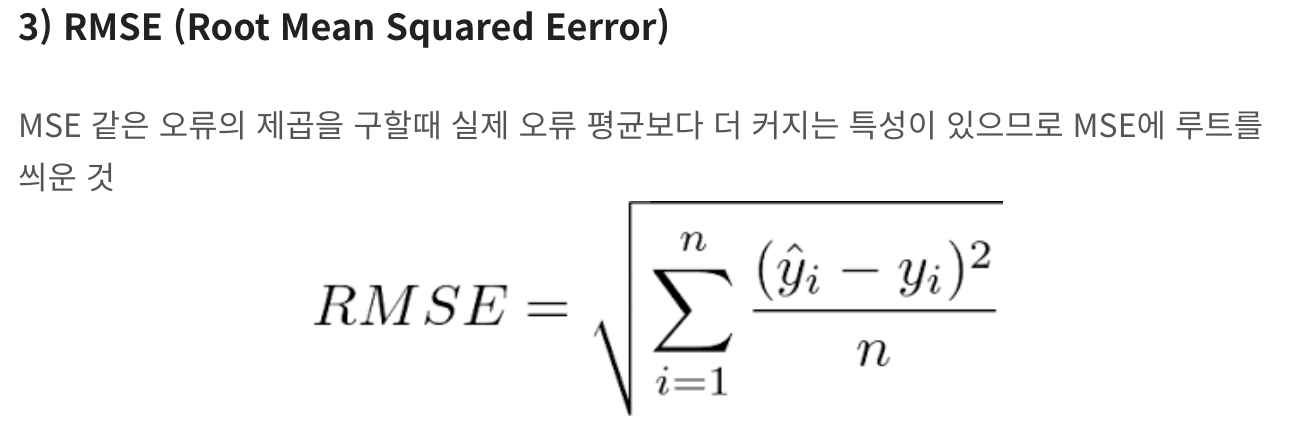

In [14]:
import math
MSE = (test_y - pred)**2

print("선형회귀 분석 결과 RMSE는 ", round(math.sqrt(sum(MSE)/len(MSE)),3), "입니다.")

선형회귀 분석 결과 RMSE는  9.213 입니다.


# 상관관계 확인

In [15]:
df['y'] = df['SBP']-df['DBP']
df.corr()

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS_2,DIS_3,DIS_4,y
SEX,1.000000,0.085226,-0.168796,-0.190420,-0.101150,-0.170833,0.017263,-0.018733,-0.002512,-0.060522
BTH_G,0.085226,1.000000,0.275981,0.134484,0.213951,0.088089,0.358602,0.132901,-0.485767,0.275689
SBP,-0.168796,0.275981,1.000000,0.743006,0.186501,0.304383,0.262868,0.021142,-0.303971,0.743398
DBP,-0.190420,0.134484,0.743006,1.000000,0.138717,0.275492,0.191500,-0.002349,-0.192310,0.104699
FBS,-0.101150,0.213951,0.186501,0.138717,1.000000,0.173688,0.015479,0.331546,-0.334131,0.138498
BMI,-0.170833,0.088089,0.304383,0.275492,0.173688,1.000000,0.148639,0.029621,-0.194889,0.176977
DIS_2,0.017263,0.358602,0.262868,0.191500,0.015479,0.148639,1.000000,-0.093612,-0.745300,0.199226
DIS_3,-0.018733,0.132901,0.021142,-0.002349,0.331546,0.029621,-0.093612,1.000000,-0.358720,0.033764
DIS_4,-0.002512,-0.485767,-0.303971,-0.192310,-0.334131,-0.194889,-0.745300,-0.358720,1.000000,-0.259491
y,-0.060522,0.275689,0.743398,0.104699,0.138498,0.176977,0.199226,0.033764,-0.259491,1.000000


# 나이에 따른 맥압

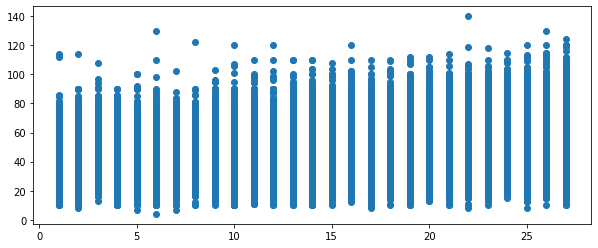

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.scatter(df['BTH_G'], df['y'])
plt.show()

# SBP(수축기혈압)에 따른 맥압

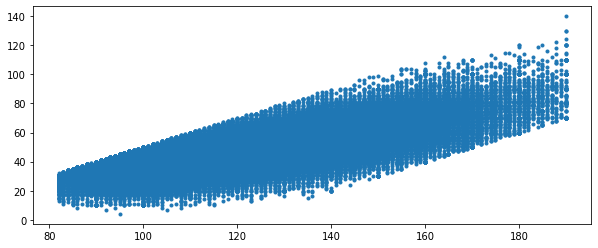

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['SBP'], df['y'], '.')
plt.show()